   Nama : Khoirul Anam

   Nim  : G.231.21.0144

   Kelas : B_Sore

  Progdi : Telnik Informatika




In [11]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset retail_raw_reduced.csv dengan pandas disini saya memakai variabel data
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
data.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


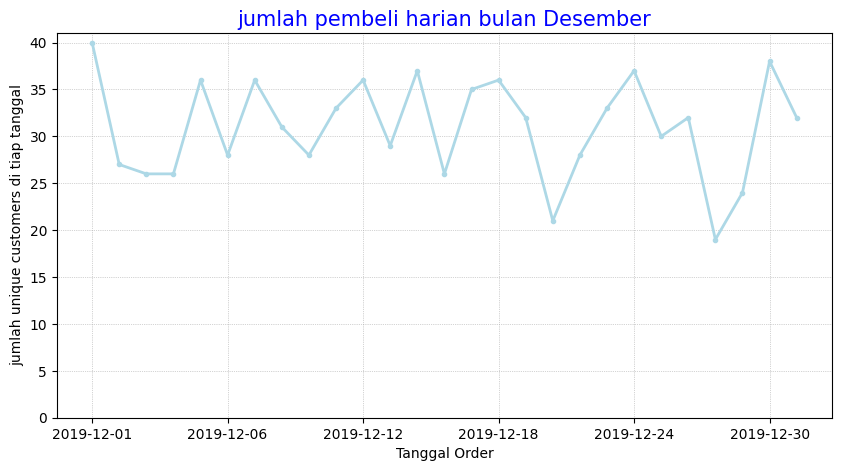

In [78]:
# Buat kolom bulan_order
data['bulan_order'] = data['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
data['gmv'] = data['item_price'] * data['quantity']
# Plot grafik 10 x 5
plt.figure(figsize=(10, 5))
data[data['bulan_order']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='lightblue', marker='.', linewidth=2)
plt.title('jumlah pembeli harian bulan Desember', loc='center', pad=5, fontsize=15, color='blue')
plt.xlabel('Tanggal Order', fontsize=10)
plt.ylabel('jumlah unique customers di tiap tanggal', fontsize=10)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

Case 1

Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya
untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands
tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.

In [24]:
#ambil informasi top 5 brands berdasarkan quantity
top_5_brands = (data[data['bulan_order']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
top5brand = data[(data['bulan_order']=='2019-12') & (data['brand'].isin(top_5_brands['brand'].to_list()))]
# print top brands
print(top_5_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


Case 2 Multi-line chart daily quantity untuk brand top 5

Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1
tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain).
Beri anotasi untuk titik lonjakan tersebut.



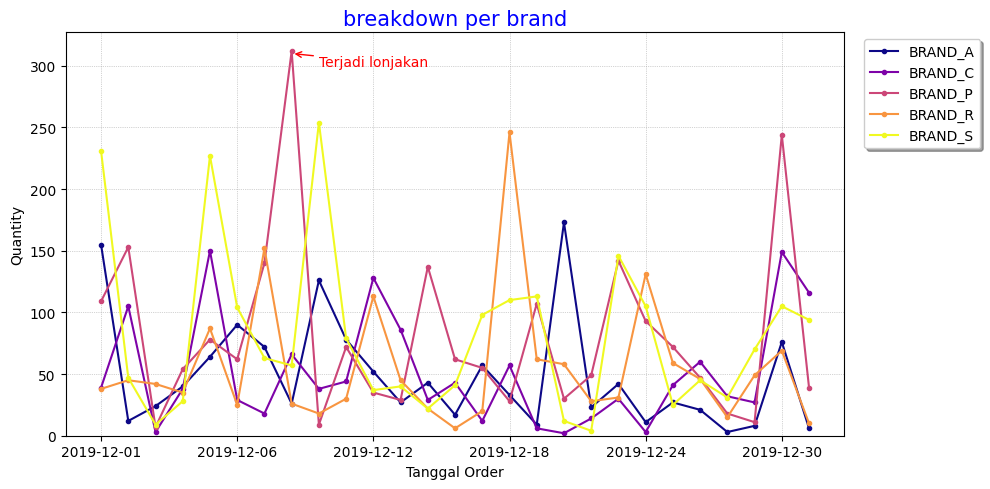

In [77]:
top5brand.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('breakdown per brand',loc='center',pad=5, fontsize=15, color='blue')
plt.xlabel('Tanggal Order', fontsize = 10)
plt.ylabel('Quantity',fontsize = 10)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
              color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

Case 3

Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan
barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

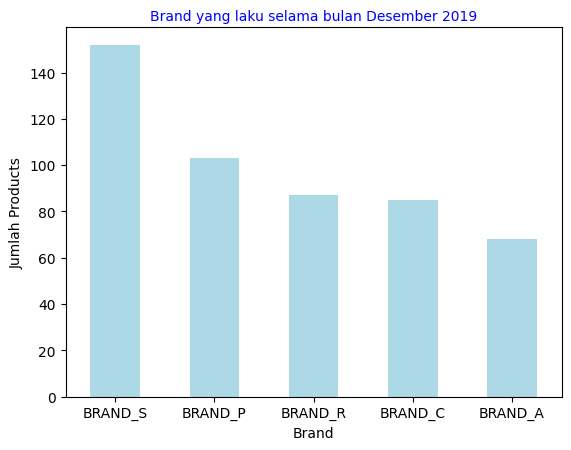

In [76]:
plt.clf()
top5brand.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Brand yang laku selama bulan Desember 2019',loc='center',pad=5, fontsize=10,color="blue")
plt.xlabel('Brand', fontsize = 10)
plt.ylabel('Jumlah Products',fontsize = 10)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

Case 4  Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019

Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di
bulan Desember 2019. Apakah ada pola yang menarik?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

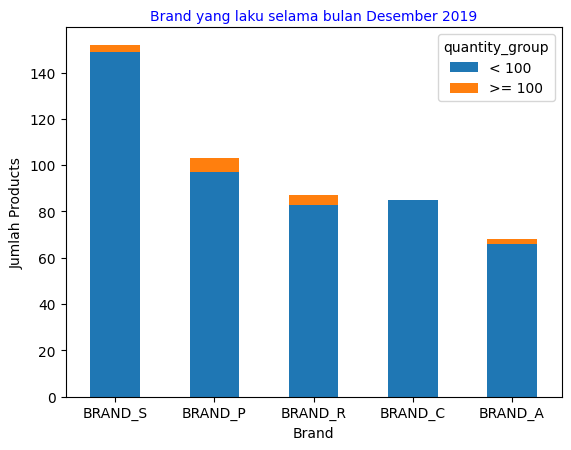

In [75]:
# buat dataframe baru, untuk jumlah quantity terjual per product
dataTop5BrandPerProdact = top5brand.groupby(['brand','product_id'])['quantity'].sum().reset_index()
# beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataTop5BrandPerProdact['quantity_group'] = dataTop5BrandPerProdact['quantity'].apply(lambda x: '>= 100'  if x>=100 else '< 100')
dataTop5BrandPerProdact.sort_values('quantity',ascending=False,inplace=True)
# mengurutan brand berdasarkan banyaknya semua product
s_sort = dataTop5BrandPerProdact.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
# membuat plot stacked barchart
dataTop5BrandPerProdact.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Brand yang laku selama bulan Desember 2019',loc='center',pad=5, fontsize=10, color='blue')
plt.xlabel('Brand', fontsize = 10)
plt.ylabel('Jumlah Products',fontsize = 10)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

Case 5  Murah atau mahalkah harga produk brand top 5

Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap
product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah
atau yang mahal?

(0.0, 2000000.0)

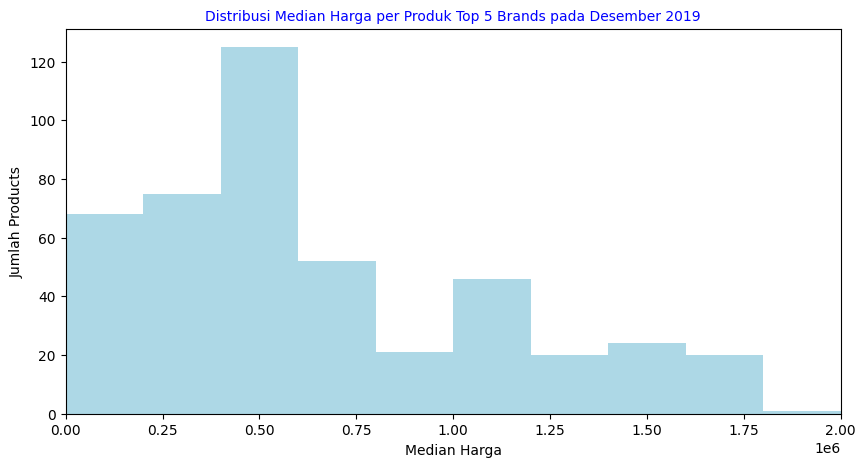

In [73]:
plt.figure(figsize=(10,5))
plt.hist(top5brand.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='lightblue')
plt.title('Distribusi Median Harga per Produk Top 5 Brands pada Desember 2019',fontsize=10, color='blue')
plt.xlabel('Median Harga', fontsize = 10)
plt.ylabel('Jumlah Products',fontsize = 10)
plt.xlim(xmin=0,xmax=2000000)

Case 6a Korelasi quantity vs GMV

Untuk setiap product_id, cek scatterplot antara quantity dan GMV, apakah ada korelasi? Bagaimana dengan
median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

([<matplotlib.axis.YTick at 0x7f26683e6b30>,
 [Text(0, 0.0, '0'),
  Text(0, 25000000.0, '25'),
  Text(0, 50000000.0, '50'),
  Text(0, 75000000.0, '75'),
  Text(0, 100000000.0, '100'),
  Text(0, 125000000.0, '125'),
  Text(0, 150000000.0, '150'),
  Text(0, 175000000.0, '175'),
  Text(0, 200000000.0, '200')])

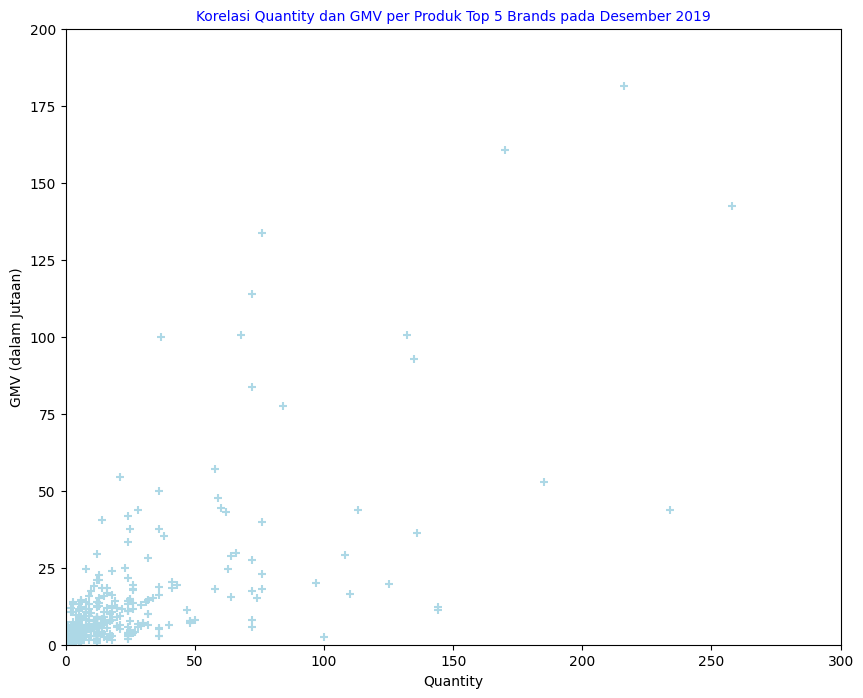

In [72]:
#agregat per product
dataTop5BrandPerProdact = top5brand.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(dataTop5BrandPerProdact['quantity'],dataTop5BrandPerProdact['gmv'], marker='+', color='lightblue')
plt.title('Korelasi Quantity dan GMV per Produk Top 5 Brands pada Desember 2019',fontsize=10, color='blue')
plt.xlabel('Quantity', fontsize = 10)
plt.ylabel('GMV (dalam Jutaan)',fontsize = 10)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

Case 6b  Korelasi median harga vs quantity

Untuk setiap product_id, cek scatterplot antara quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case
6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih
banyak?

(0.0, 250.0)

<Figure size 640x480 with 0 Axes>

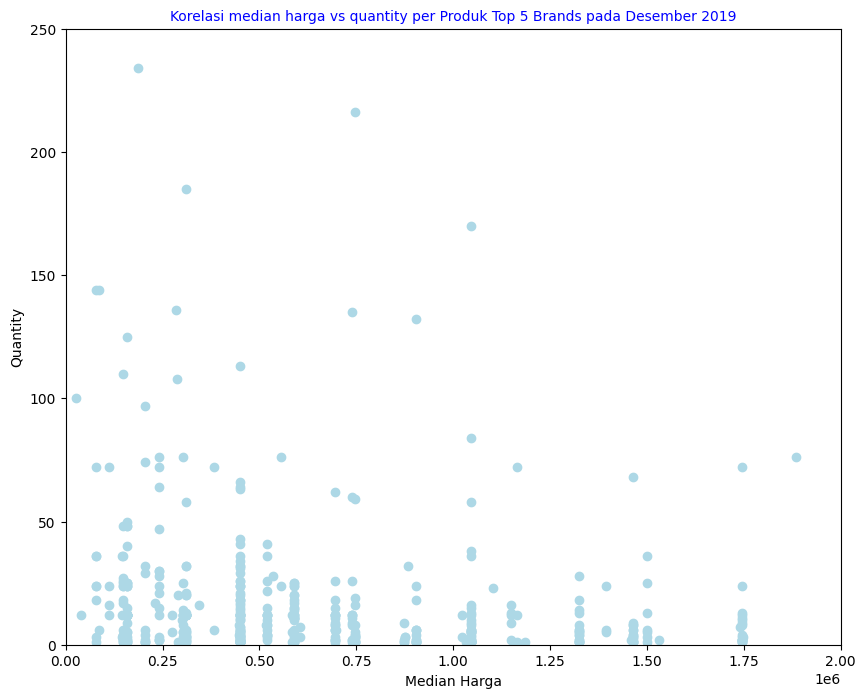

In [79]:
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
dataTop5BrandPerProdact = top5brand.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(dataTop5BrandPerProdact['item_price'],dataTop5BrandPerProdact['quantity'], marker='o', color='lightblue')
plt.title('Korelasi median harga vs quantity per Produk Top 5 Brands pada Desember 2019',fontsize=10, color='blue')
plt.xlabel('Median Harga', fontsize = 10)
plt.ylabel('Quantity',fontsize = 10)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)